### **Context**
The movie rating system that film buffs know today has been around for over 50 years. Over the years, the cultural standards and norms have changed and so have movie ratings. However, even today the process of rating a film remains a closely guarded industry secret.


### **Objective**
MovieLens is a prominent company in the internet and entertainment domain, offering an extensive online database with detailed information related to films, television series, and online streaming content. The database encompasses various aspects such as cast details, production crew, trivia, ratings, and both fan and critical reviews. As a Data Scientist for the company, the goal is to conduct a comprehensive analysis of this data and extract valuable insights that can help improve user engagement and overall experience.<br>
<br>
- **movie.csv**: The file contains information related to the movies and their genres. Columns: movie id, movie title, release date, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western<br>
- **user.csv**: It contains information about the users who have rated the movies. Columns: user id, age, gender, occupation, zip code<br>
- **ratings.csv**: It contains information for ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp<br>
<br>

### **Importing the necessary packages**

In [56]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading the datasets**

In [57]:
# Reading datasets by using read_csv from pandas package
movie = pd.read_csv("movie.csv")
user = pd.read_csv("user.csv")
ratings = pd.read_csv("ratings.csv")

### **Data Overview**

#### **User Dataset**

In [58]:
# checking the top 5 rows of the dataset
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [59]:
# checking the last 5 rows of the dataset
user.tail()

,user id,age,gender,occupation,zip code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [60]:
# checking the random 5 rows of the data
user.sample(5)

,user id,age,gender,occupation,zip code
286,287,21,M,salesman,31211
919,920,30,F,artist,90008
392,393,19,M,student,83686
431,432,22,M,entertainment,50311
769,770,28,M,student,14216


In [61]:
# checking the shape of the data
user.shape

(943, 5)

- There are 943 rows and 5 columns in the user dataset.

In [62]:
# checking the basic info about the dataframe
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


-  **gender**, **occupation**, and **zip code** columns are of object type, while the other columns are of integer type since they contain numerical values

In [63]:
# checking statistical summary of the dataset
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


- The average age of users who have rated the movies is 34 years
- The age of users ranges from 7 years to 73 years


#### **Movie Dataset**

In [64]:
# checking top 5 rows of the dataframe
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
# checking the last 5 rows of the dataframe
movie.tail()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1675,1678,Mat' i syn,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,1679,B. Monkey,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1677,1680,Sliding Doors,1-Jan-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1678,1681,You So Crazy,1-Jan-94,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,1682,Scream of Stone (Schrei aus Stein),8-Mar-96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# checking the random 5 rows of the dataframe
movie.sample(5)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
705,707,Enchanted April,1-Jan-91,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,41,Billy Madison,1-Jan-95,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
64,65,What's Eating Gilbert Grape,1-Jan-93,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
453,455,Jackie Chan's First Strike,10-Jan-97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,1337,Larger Than Life,1-Nov-96,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# checking the shape of the dataframe
movie.shape

(1680, 21)

- There are 1680 rows and 21 columns in the movie dataset.

In [68]:
# checking the basic infor of the dataframe
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

- **movie title** and **release date** columns are of object type since these columns are having some text in them.
- All the other columns are of integer type since they are containing numbers in them.

In [69]:
# checking basic statistical summary of the dataframe
movie.describe()

,movie id,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,841.525595,0.149405,0.080357,0.025000,0.072619,0.300595,0.064881,0.029762,0.431548,0.013095,0.014286,0.054762,0.033333,0.036310,0.147024,0.060119,0.149405,0.042262,0.016071
std,485.609591,0.356593,0.271926,0.156171,0.259587,0.458653,0.246389,0.169980,0.495440,0.113717,0.118701,0.227583,0.179559,0.187115,0.354235,0.237778,0.356593,0.201246,0.125788
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Ratings**

In [70]:
# checking the top 5 rows of the dataframe
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [71]:
# checking the last 5 rows of the dataframe
ratings.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [72]:
# checking the random 5 rows of the dataframe
ratings.sample(5)

,user id,movie id,rating,timestamp
95007,880,186,4,880174808
50903,409,1558,5,881107281
65170,92,451,3,875660083
82357,932,863,4,891249063
97262,833,1628,3,875225219


In [73]:
# checking the shape of the dataframe
ratings.shape

(100000, 4)

- There are 100000 rows and 4 columns in the ratings dataset.

In [74]:
# checking the basic info of the dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [75]:
# checking the statistical summary of the dataframe/
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


- The average rating of all the movies is around 3.53 while  the ratings ranges from 1 to 5.

# Data Analysis

###How many movies belong to a particular genre?

In [76]:
# checking the top 5 rows of the movies dataframe
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
# getting all the list of all the columns
cols_movies = movie.columns.to_list()
cols_movies

['movie id',
 'movie title',
 'release date',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [78]:
# Getting only the genre columns
genre_columns = [col for col in cols_movies if col not in ['movie id', 'movie title', 'release date']]
genre_columns

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [79]:
# checking the total number of genres
print('The number of genres present in the movie dataset are ', len(genre_columns))

The number of genres present in the movie dataset are  18


- There are 18 genres in total.

In [80]:
# checking number of movies for each genere
genre_counts = movie[genre_columns].sum().sort_values(ascending=False)
genre_counts

,0
Drama,725
Comedy,505
Thriller,251
Action,251
Romance,247
Adventure,135
Childrens,122
Crime,109
Sci-Fi,101
Horror,92


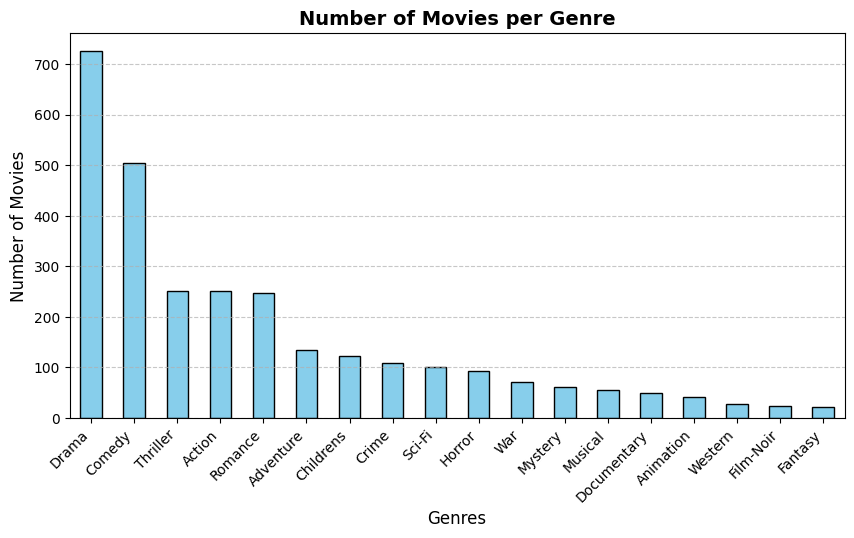

In [94]:
# plotting the results
plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Movies per Genre", fontsize=14, fontweight='bold')
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Movies are distributed across 18 genres in total
- Drama genre has the highest number of movies with 725 in total followed by Comedy at 505
- The top five genres with the highest number of movies are Drama, Comedy, Action, Thriller, and Romance
- Fantasy genre has the lowest number of movies

### Find the movies that have more than one genre

In [26]:
# creating column of number of genre for each movie
movie["Number of Genres"] = movie.loc[:, genre_columns].sum(axis=1)

In [27]:
# checking the top 5 rows
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3


In [28]:
# subsetting the movies with more than 1 genre
movie[movie['Number of Genres']>1]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1669,MURDER and murder,20-Jun-97,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
1667,1670,Tainted,1-Feb-98,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
1670,1673,Mirage,1-Jan-95,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1676,1679,B. Monkey,6-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


In [29]:
# checking the total number of movies with more than 1 genre
print('Total number of movies more than 1 genre:', movie[movie['Number of Genres']>1].shape[0])

Total number of movies more than 1 genre: 849


- There are 849 movies that are having more than one genre.

In [30]:
# checking the total number of movies
print('Total number of movies:', movie.shape[0])

Total number of movies: 1680


- There are 1680 movies. So out of 1680 movies, 849 i.e around 50% of the movies are having more than one genre.

- Out of 1680 movies, 849 movies comprising around 50% are having more than one genre and 831 movies have only single genre
- This shows that we have an almost equal ratio (50:50) of movies having more than one genre and having single genre

### The genres that are most liked by the users

In [31]:
# merging the movie and ratings dataFrames
df_merge = movie.merge(ratings, on = 'movie id', how = 'inner')
df_merge.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,66,3,883601324


In [32]:
genre_columns

['Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [89]:
# calculating the average rating for each genre
genre = []
rating = []
for i in genre_columns:
  genre.append(i)
  rating.append(df_merge[df_merge[i]==1].rating.mean())
genre_rating = pd.DataFrame({'genre':genre, 'avg_rating':rating})
genre_rating.sort_values(by='avg_rating', ascending=False).reset_index(drop=True)

,genre,avg_rating
0,Film-Noir,3.921523
1,War,3.815812
2,Drama,3.687379
3,Documentary,3.672823
4,Mystery,3.638132
5,Crime,3.632278
6,Romance,3.621705
7,Western,3.613269
8,Animation,3.576699
9,Sci-Fi,3.560723


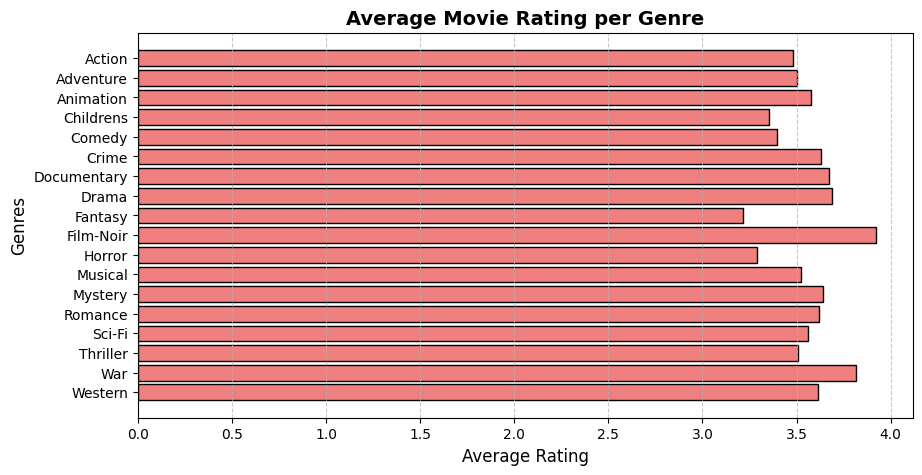

In [93]:
# Ploting the results
plt.figure(figsize=(10, 5))
plt.barh(genre_rating['genre'], genre_rating['avg_rating'], color='lightcoral', edgecolor='black')
plt.title("Average Movie Rating per Genre", fontsize=14, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- Film-Noir genre is having the highest average ratings with an average rating of 3.92 followed by 'War' genre with rating of 3.81*
- Fantasy genre is having the lowest average ratings with an average rating of 3.21
- Among 18 genres, only 5 genres have received a rating below 3.5 which means around 72% of genres are rated above average

### Which movies have been most preferred by the users?

In [95]:
# checking top 5 rows
df_merge.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Number of Genres,user id,rating,timestamp
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,308,4,887736532
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,287,5,875334088
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,148,4,877019411
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,280,4,891700426
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,3,66,3,883601324


Now let's apply the groupby function to our datasets:

In [96]:
# checking avg rating of each movie
avg_rating = df_merge.groupby(['movie title'])['rating'].mean().reset_index()
avg_rating

,movie title,rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390
...,...,...
1652,Young Guns,3.207921
1653,Young Guns II,2.772727
1654,"Young Poisoner's Handbook, The",3.341463
1655,Zeus and Roxanne,2.166667


In [36]:
# renaming the columns
avg_rating.rename(columns={'rating':'avg_rating'},inplace=True)
avg_rating.head()

,movie title,Avg_rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390


In [37]:
# sorting the values
avg_rating.sort_values(ascending=False, by= 'Avg_rating')

,movie title,Avg_rating
30,Aiqing wansui,5.0
1170,Prefontaine,5.0
631,"Great Day in Harlem, A",5.0
1354,Someone Else's America,5.0
1382,Star Kid,5.0
...,...,...
482,"Eye of Vichy, The (Oeil de Vichy, L')",1.0
1604,Wend Kuuni (God's Gift),1.0
1648,Yankee Zulu,1.0
1640,"Woman in Question, The",1.0


In [38]:
# subseting the movies with avg rating of 5
avg_rating[avg_rating['Avg_rating']==5]

,movie title,Avg_rating
30,Aiqing wansui,5.0
461,Entertaining Angels: The Dorothy Day Story,5.0
631,"Great Day in Harlem, A",5.0
942,Marlene Dietrich: Shadow and Light (,5.0
1170,Prefontaine,5.0
1270,"Saint of Fort Washington, The",5.0
1274,Santa with Muscles,5.0
1354,Someone Else's America,5.0
1382,Star Kid,5.0
1466,They Made Me a Criminal,5.0


- There are 10 movies which have been rated as 5.0

### Which movies are rated most of the times

In [39]:
# calculating the count of rating for each movie
movie_count = df_merge.groupby(['movie title'])['rating'].count().reset_index()
movie_count

,movie title,rating
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41
...,...,...
1652,Young Guns,101
1653,Young Guns II,44
1654,"Young Poisoner's Handbook, The",41
1655,Zeus and Roxanne,6


In [40]:
# renaming the columns
movie_count.rename(columns={'rating':'Rating_counts'},inplace=True)
movie_count.head()

,movie title,Rating_counts
0,'Til There Was You,9
1,1-900,5
2,101 Dalmatians,109
3,12 Angry Men,125
4,187,41


In [97]:
# Sorting the values in descending order
movie_count_sorted = movie_count.sort_values(by='Rating_counts', ascending=False)
movie_count_sorted

,movie title,Rating_counts
1393,Star Wars,583
332,Contact,509
497,Fargo,508
1232,Return of the Jedi,507
858,Liar Liar,485
...,...,...
1576,"Very Natural Thing, A",1
1587,"Walk in the Sun, A",1
1088,Office Killer,1
1123,Paris Was a Woman,1


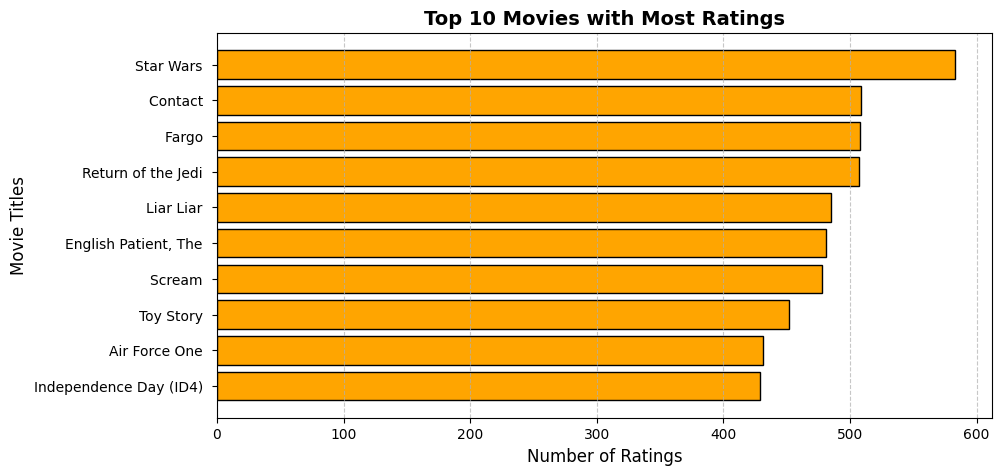

In [101]:
# Ploting the results
top_10_movie_count = movie_count_sorted.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_10_movie_count['movie title'], top_10_movie_count['Rating_counts'], color='orange', edgecolor='black')
plt.title("Top 10 Movies with Most Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Movie Titles", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- **Star Wars** has been rated most number of times and there are few movies which have least rating counts like **Paris Was a Woman	, Nobody Loves Me (Keiner liebt mich)**

In [42]:
# subsetting the movies with rating count greater than 100
movie_100 = movie_count[movie_count['Rating_counts']>100]
movie_100

,movie title,Rating_counts
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151
...,...,...
1627,Willy Wonka and the Chocolate Factory,326
1638,"Wizard of Oz, The",246
1646,"Wrong Trousers, The",118
1651,Young Frankenstein,200


There are 334 movies which are rated more than 100 times by the users

In [43]:
# taking the top 5 movies with avg rating
avg_rating.head()

,movie title,Avg_rating
0,'Til There Was You,2.333333
1,1-900,2.600000
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390


In [44]:
# taking the top 5 movies with rating count
movie_100.head()

,movie title,Rating_counts
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151


In [45]:
# merging the dataframes to take top 100 movies
df_top= avg_rating.merge(movie_100, on = 'movie title', how = 'inner')
df_top

,movie title,Avg_rating,Rating_counts
0,101 Dalmatians,2.908257,109
1,12 Angry Men,4.344000,125
2,2001: A Space Odyssey,3.969112,259
3,Absolute Power,3.370079,127
4,"Abyss, The",3.589404,151
...,...,...,...
329,Willy Wonka and the Chocolate Factory,3.631902,326
330,"Wizard of Oz, The",4.077236,246
331,"Wrong Trousers, The",4.466102,118
332,Young Frankenstein,3.945000,200


In [46]:
# checking the top 5 movies with highest avg rating
df_top.sort_values(ascending=False, by='Avg_rating').head(10)

,movie title,Avg_rating,Rating_counts
63,"Close Shave, A",4.491071,112
260,Schindler's List,4.466443,298
331,"Wrong Trousers, The",4.466102,118
54,Casablanca,4.456790,243
269,"Shawshank Redemption, The",4.445230,283
248,Rear Window,4.387560,209
319,"Usual Suspects, The",4.385768,267
291,Star Wars,4.358491,583
1,12 Angry Men,4.344000,125
59,Citizen Kane,4.292929,198


Similarly we can sort them as per the ratings counts also

In [47]:
# checking the top 5 movies with highest rating count
df_top.sort_values(ascending=False, by='Rating_counts').head(10)

,movie title,Avg_rating,Rating_counts
291,Star Wars,4.358491,583
69,Contact,3.803536,509
107,Fargo,4.155512,508
251,Return of the Jedi,4.007890,507
178,Liar Liar,3.156701,485
99,"English Patient, The",3.656965,481
261,Scream,3.441423,478
309,Toy Story,3.878319,452
8,Air Force One,3.631090,431
159,Independence Day (ID4),3.438228,429


<h1><font size=5>Insights</font></h1>


- There are 334 movies in total which have received ratings more than 100 times
- As per the average rating, **Close Shave, A** has maximum average rating with a rating count of 112
- As per the rating counts, **Star Wars** has received maximum number counts with an average rating of 4.35
- There are few movies which have least rating counts like Paris Was a Woman	,Á köldum klaka (Cold Fever)

### Relationship between demographic details of the users and ratings for the movies



In [48]:
# Merging user dataset with movie and ratings
df_merge_all = df_merge.merge(user, on = 'user id', how = 'inner')

In [49]:
df_merge_all.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,War,Western,Number of Genres,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,308,4,887736532,60,M,retired,95076
1,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,287,5,875334088,21,M,salesman,31211
2,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,148,4,877019411,33,M,engineer,97006
3,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,280,4,891700426,30,F,librarian,22903
4,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,3,66,3,883601324,23,M,student,80521


In [50]:
# checking the proportion of gender column
user['gender'].value_counts(normalize=True)

,proportion
gender,
M,0.710498
F,0.289502


In [51]:
# checking the avg rating by gender
df_merge_all.groupby('gender').rating.mean()

,rating
gender,
F,3.531510
M,3.529333


- The average rating given by Males and Females is almost equal with a value of around 3.53

In [52]:
# checking the avg rating by occupation
df_merge_all.groupby('occupation')['rating'].mean().sort_values(ascending= False)

,rating
occupation,
none,3.777778
lawyer,3.735316
doctor,3.688889
educator,3.670692
artist,3.653380
administrator,3.635646
scientist,3.611273
salesman,3.582944
programmer,3.568205


- Users who are not working have given highest ratings as compared to users who are working professionals
- Healthcare workers have given lowest ratings on an average

In [53]:
# checking the avg rating by occupation and then gender
df_merge_all.groupby(['occupation','gender']).rating.mean()

occupation     gender
administrator  F         3.781839
               M         3.555233
artist         F         3.347065
               M         3.875841
doctor         M         3.688889
educator       F         3.699132
               M         3.660246
engineer       F         3.751724
               M         3.537676
entertainment  F         3.448889
               M         3.439807
executive      F         3.773756
               M         3.320340
healthcare     F         2.736021
               M         3.639839
homemaker      F         3.278810
               M         3.500000
lawyer         F         3.623188
               M         3.741379
librarian      F         3.580070
               M         3.537920
marketing      F         3.522624
               M         3.474801
none           F         3.632877
               M         3.876636
other          F         3.531114
               M         3.563447
programmer     F         3.577566
               M         3.567674
retired        F         3.239437
               M         3.477243
salesman       F         3.870206
               M         3.394584
scientist      F         3.251799
               M         3.637311
student        F         3.602879
               M         3.484440
technician     F         3.268519
               M         3.540477
writer         F         3.663986
               M         3.180770
Name: rating, dtype: float64

- Around 71% of users are Males while only 29% users are females
- The average rating given by Males and Females is almost equal with a value of around 3.53
- Users who are not working have given highest ratings as compared to users who are working professionals
- Healthcare workers have given lowest ratings on an average
- The low ratings from the healthcare sector is majorly driven by female workers
- Only male doctors have given ratings. No female doctors have given ratings as per the observations

### **Summary**

- Movies are distributed across **18 genres** in total
- The top five genres with the highest number of movies are **Drama, Comedy, Action, Thriller, and Romance**
- Out of 1680 movies, **50% of the movies** have more than one genre, while the rest have a single genre
- The **Film-Noir** genre has the highest average ratings with an average rating of 3.92, while the Fantasy genre has the lowest average ratings with an average rating of 3.21
- Among 18 genres, 72% of the genres are rated above average 3.5
- Movies like **Great Day in Harlem, A**, **Prefontaine**, etc. are top-rated movies, while movies like **Shadow of Angels (Schatten der Engel)**, **Power 98**, etc. are least rated
- There are 334 movies in total which have been rated more than 100 times
- The movie **Close Shave, A** has the highest average rating and was rated 112 times, while the **Star Wars** movie received the highest number of ratings with an average rating of 4.35
- Around 71% of users are Males while only 29% users are females
- The average rating given by Males and Females is almost equal with a value of around 3.53
- Users who are not working have rated movies higher compared to users who are working professionals
- Healthcare workers have given the lowest ratings on an average